# Surf2stl-python Examples

## 1. surf2stl.write function

### 1-1 3d surface plot in matplotlib

In [1]:
import numpy as np

# create x,y,z data for 3d surface plot
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X ** 2 + Y ** 2))

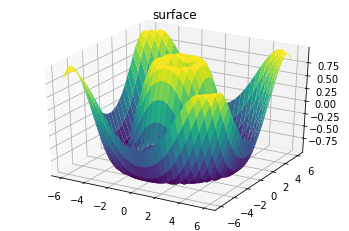

In [2]:
import matplotlib.pyplot as plt

# draw surface plot
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

### 1-2 Write the surface to a stl format file

In [3]:
import surf2stl

# export surface to a stl format file
surf2stl.write('3d-sinusoidal.stl', X, Y, Z)

Wrote 1682 facets


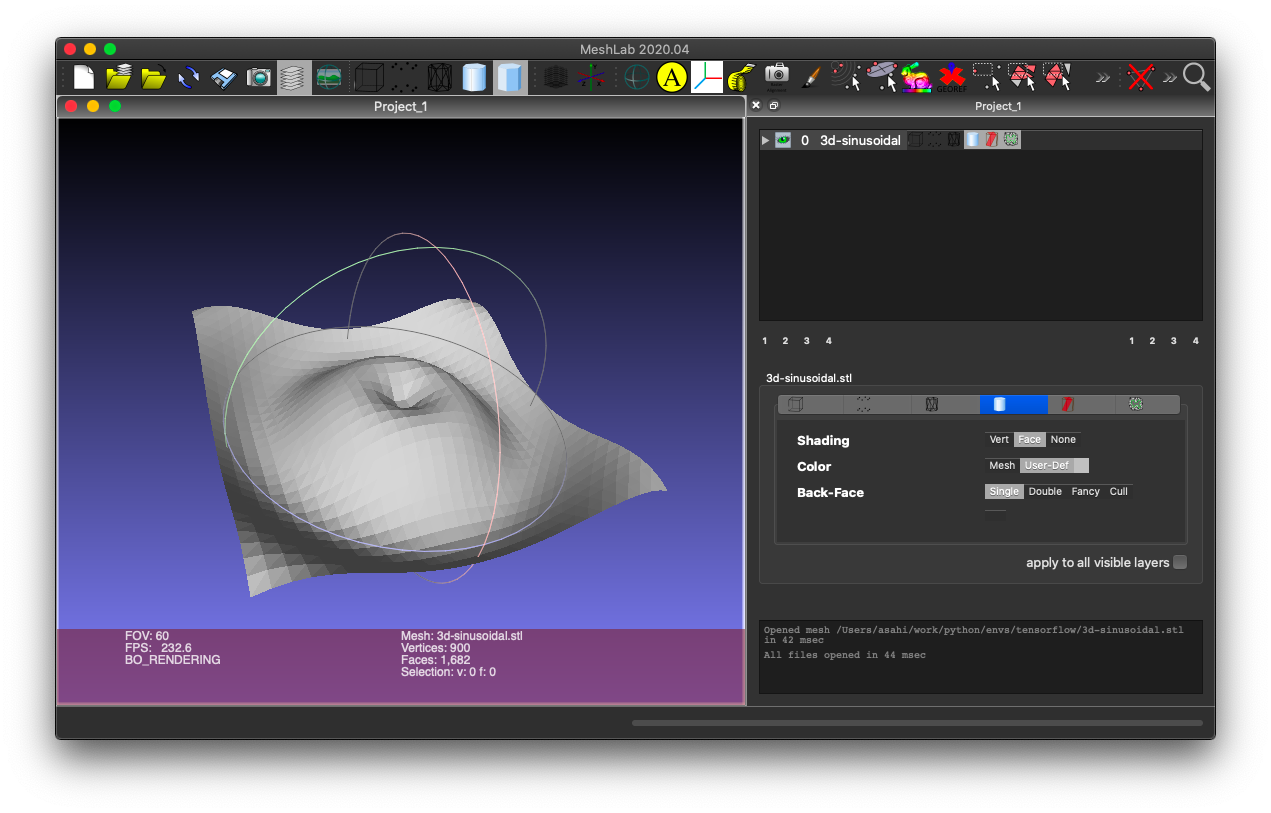

In [4]:
from IPython.display import Image

# display image of the surface in meshlab
Image('images/3d-sinusoidal_meshlab.png')

## 2. surf2stl.tri_write function

### 2-1 plot surface in matplotlib

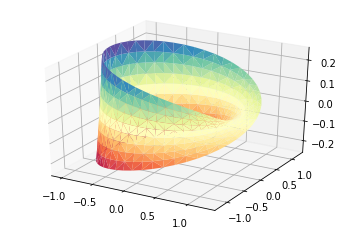

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
# ax.set_zlim(-1, 1)

plt.show()

### 2-2 Write the surface to a stl format file

In [15]:
import surf2stl
from scipy.spatial import Delaunay

delaunay_tri = Delaunay(np.array([u, v]).T)
surf2stl.tri_write('mobius.stl', x, y, z, delaunay_tri)

Wrote 882 facets


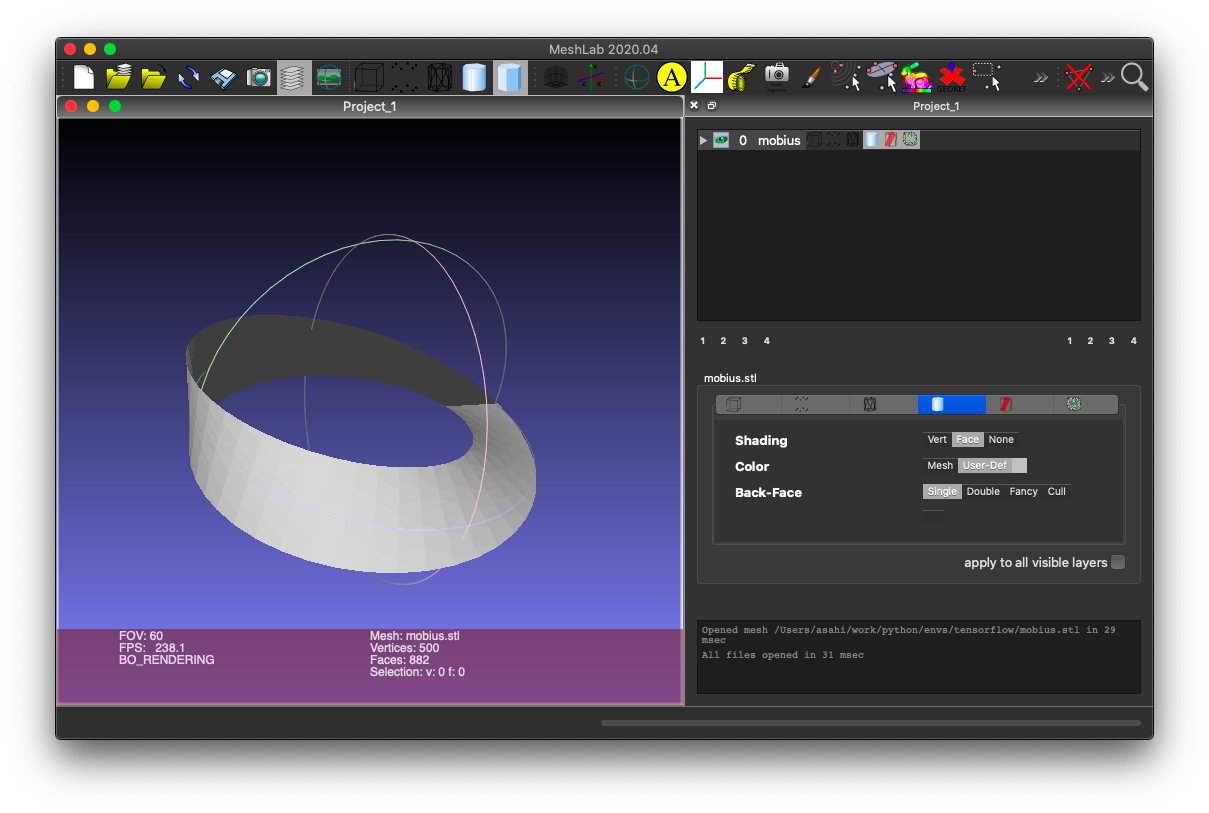

In [20]:
from IPython.display import Image

# display image of the surface in meshlab
Image('images/mobius_meshlab.png')